In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import integrate

from utils import *
from AnalyseDefectsMinimal import AnalyseDefectsMinimal

In [84]:
def gen_analysis_dict(LL, mode,):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd', \
              suffix = "short", priority = -1, LX = LL, Nframes = 200, Ninfo = 2000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_l', \
                suffix = "l", priority = 0, LX = LL, Nframes = 200, Ninfo = 5000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl',\
                    suffix = "vl", priority = 3, LX = LL, Nframes = 500, Ninfo = 10000)

    defect_list = [dshort, dlong, dvery_long,] if mode == 'all' else [dshort]
    return defect_list

def gen_analysis_dict_noise(LL):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl', \
              suffix = "n05", priority = 1, LX = LL, Nframes = 500, Ninfo = 10000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sdn20', \
                suffix = "sdn20", priority = 0, LX = LL, Nframes = 500, Ninfo = 10000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sdn50',\
                    suffix = "n50", priority = -1, LX = LL, Nframes = 500, Ninfo = 10000)

    return [dshort, dlong, dvery_long,]


def plot_defects_per_activity(obj, activity, ax = None, Ndataset = 0, stationarity_dict = {}, alpha = 0.55):
        
        output_path = obj.output_paths[Ndataset]

        act_idx = list(obj.act_list[Ndataset]).index(activity)   
        Nframes = obj.Nframes[Ndataset]

        try:
            defect_arr_av = obj.get_arrays_av(Ndataset = Ndataset)[0] 
        except:
            print('Defect array not found. Analyse defects first.')
            return

        if ax is None:
            title = 'Defect count'
            fig, ax = plt.subplots(figsize=(12, 6))
    

        ax.errorbar(np.arange(0, Nframes * obj.Ninfo[Ndataset], obj.Ninfo[Ndataset]), \
                           defect_arr_av[:, act_idx, 0], defect_arr_av[:, act_idx, 1], fmt='.', \
                            alpha = alpha, markersize=9, label='Activity = {}'.format(activity), color = f'C{1}') 

        if stationarity_dict != {}:
                x = est_stationarity(defect_arr_av[:, act_idx, 0], **stationarity_dict)[0]
        else:
            x = obj.conv_list[Ndataset][act_idx]
            
      #  x *= obj.Ninfo[Ndataset]

        if x > 0:
            ax.axvline(x, color='black', linestyle='--', alpha=0.5)

     #   xticks = np.round(np.linspace(0, Nframes * self.Ninfo[Ndataset], 20)).astype('int'), \
      #         xticklabels = np.round(np.linspace(0, Nframes * self.Ninfo[Ndataset], 20)).astype('int'),
        ax.grid()
        ax.set(ylim = (0, np.max(defect_arr_av[:, act_idx, 0]) * 1.5))

        return ax

In [85]:

LL = 512
output_path = f'data\\na512sdn'

defect_list = gen_analysis_dict_noise(LL)
 
adn = AnalyseDefectsMinimal(defect_list, output_path=output_path)

extract = True
analyze = True

In [87]:
adn.extract_results()

Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sd_vl
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sdn20
Analyse defects for input folder C:\Users\Simon Andersen\Documents\Uni\Speciale\Hyperuniformity\na512sdn50


In [89]:
adn.analyze_defects()

NB: All simulations are set to converge at the first frame for dataset 0. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 1. To change this, call update_conv_list.

NB: All simulations are set to converge at the first frame for dataset 2. To change this, call update_conv_list.



In [97]:
adn.act_list    

[(0.018, 0.019, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225),
 (0.019, 0.021, 0.022),
 (0.019, 0.021, 0.022)]

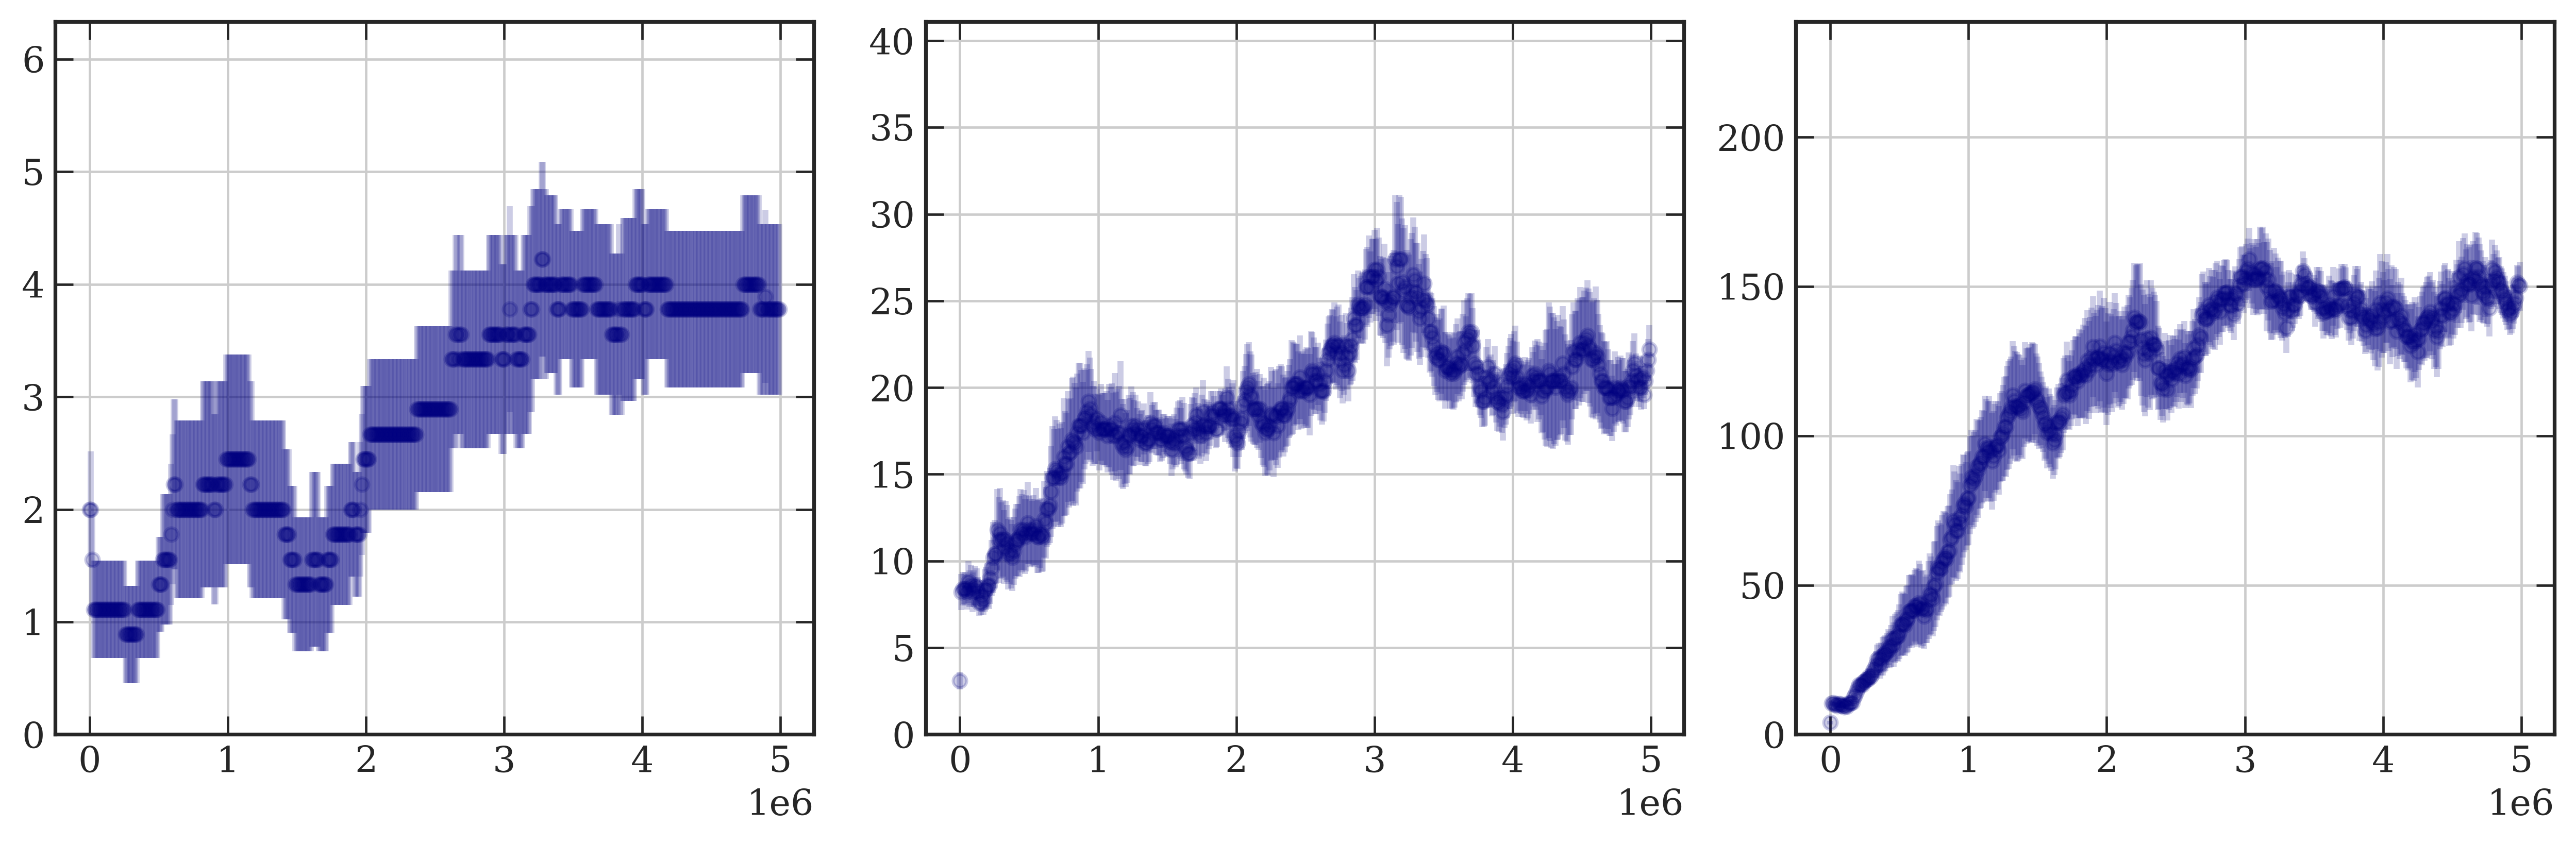

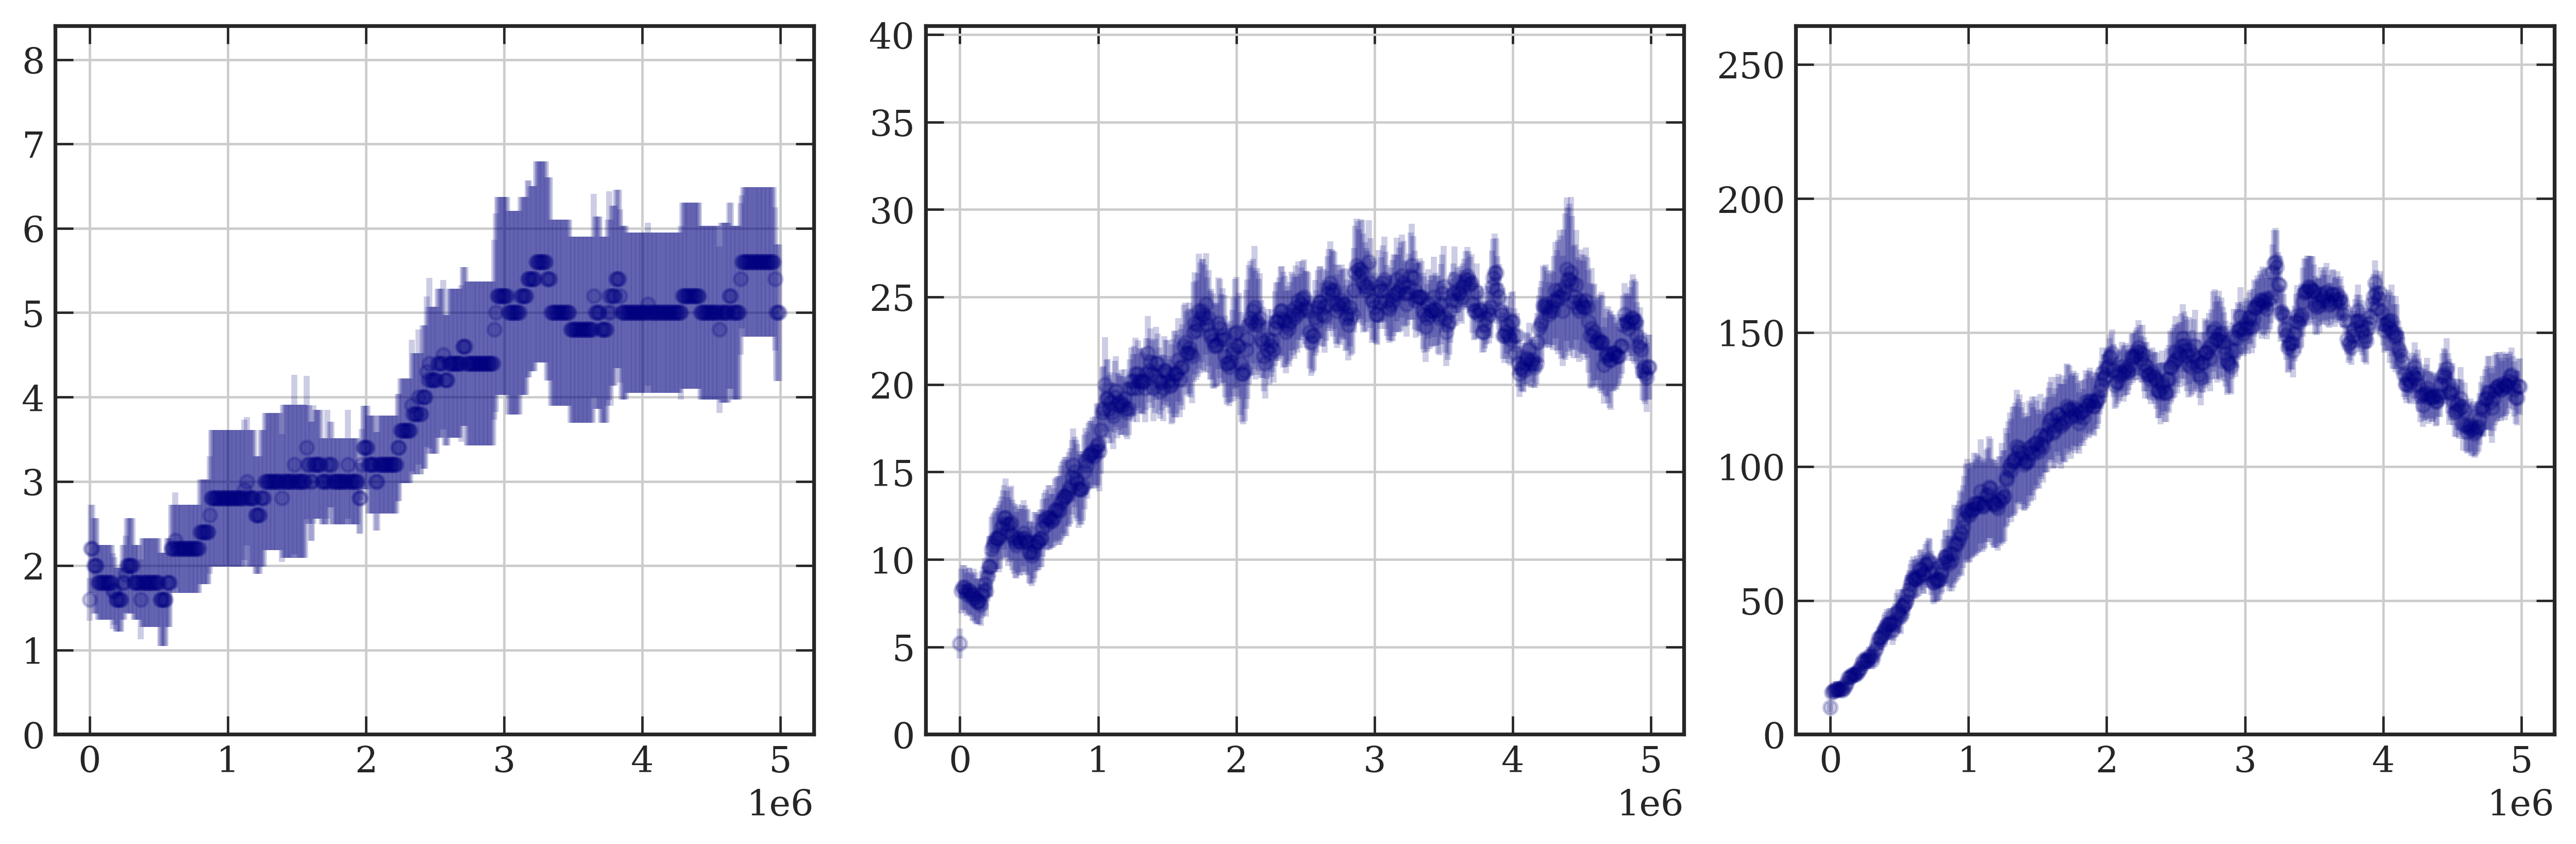

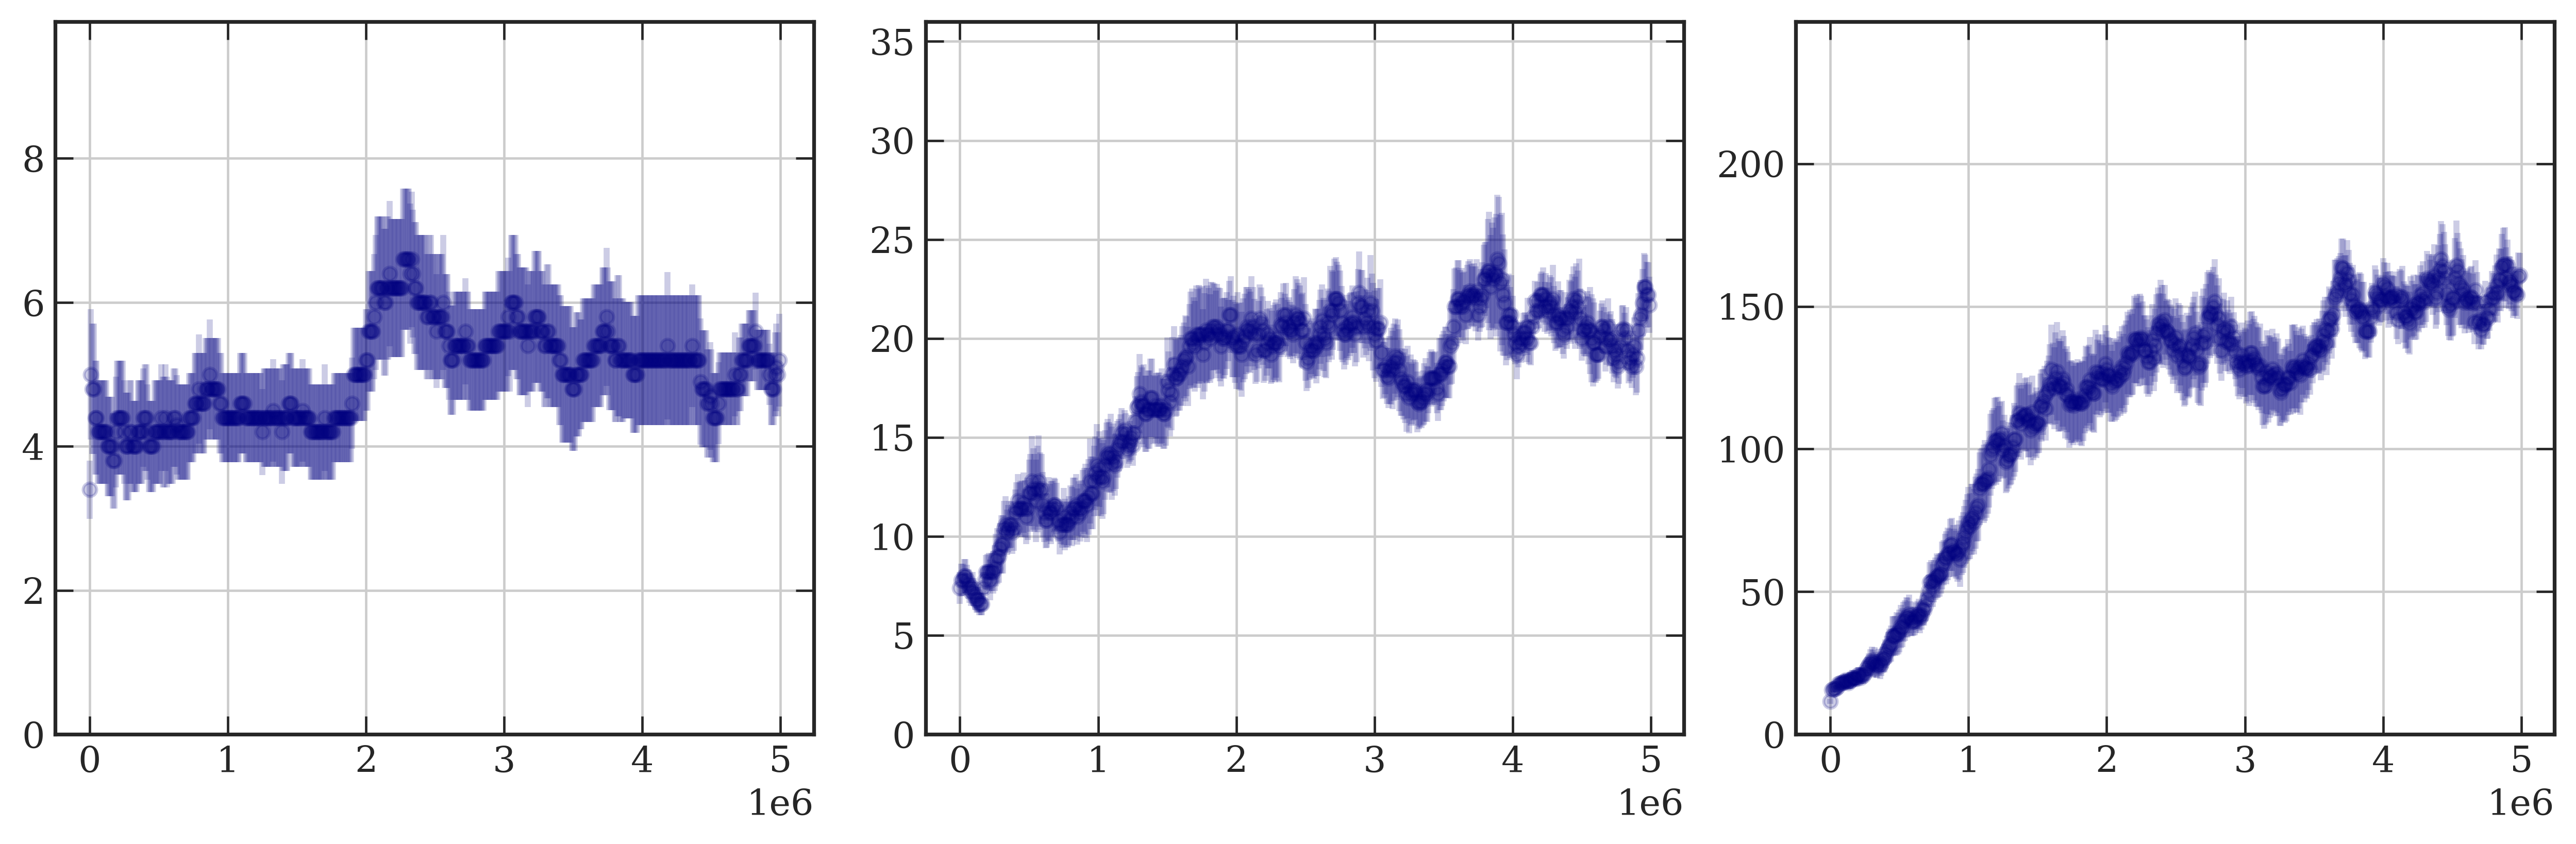

In [96]:
acts = adn.act_list[-1]
for Ndataset in range(adn.Ndata):
    fig, ax = plt.subplots(ncols=3, figsize=(12,4))
    
    for i, activity in enumerate(acts):
        plot_defects_per_activity(adn, activity, ax=ax[i], Ndataset = Ndataset,alpha=.2)



In [3]:
LL = 512
output_path = f'data\\na512sd'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)
 
ad = AnalyseDefectsMinimal(defect_list, output_path=output_path)

extract = False
analyze = False

In [5]:
if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()

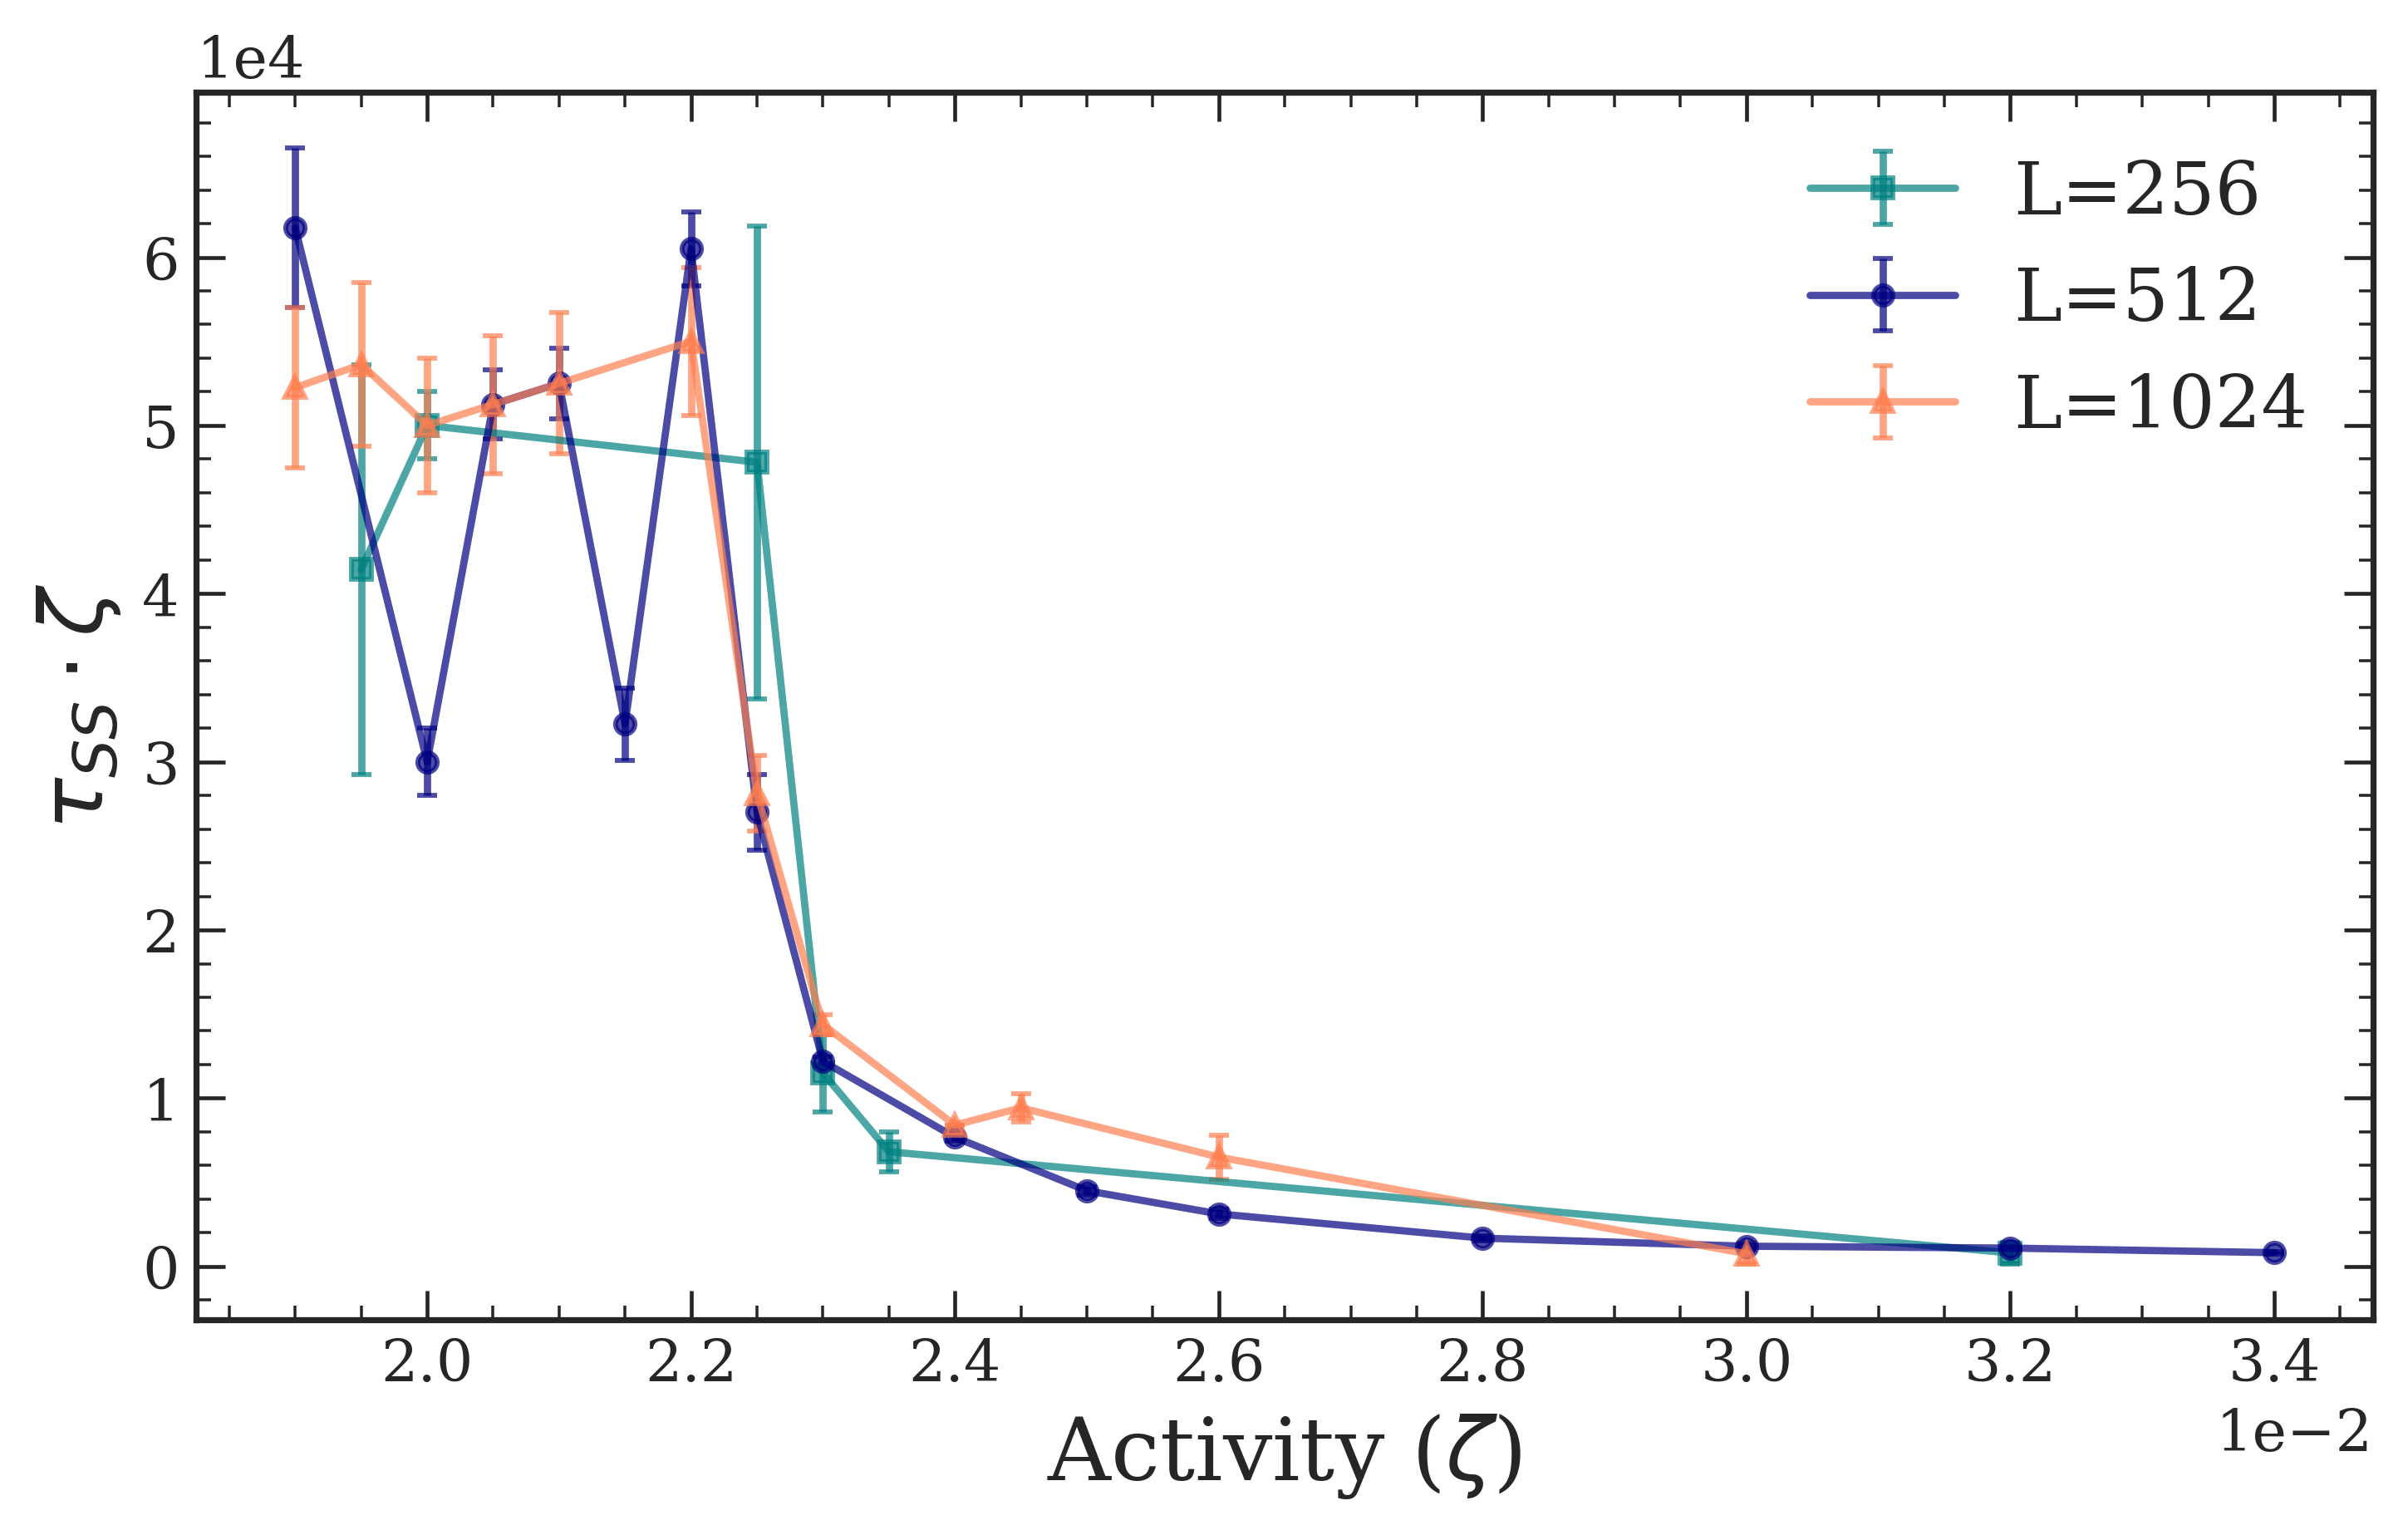

In [4]:
scale_with_activity = True
act_idx_cutoff_512 = 1

X_256 = np.array([0.0195, 0.02, 0.0225, 0.023, 0.0235, 0.032])
Y_256 = np.array([(1.5e6 + 2.75e6)/2, 2.5e6, (1.5e6 + 2.75e6) / 2, 5e5, 2.9e5, 2.5e4])
dY_256 = np.array([np.std([1.5e6, 2.75e6]), 1e5, np.std([1.5e6, 2.75e6]), 1e5, 5e4, 2e4])

X_1024 = np.array([0.019, 0.0195, 0.02, 0.0205, 0.021, 0.022, .0225, 0.023, 0.024, 0.0245, 0.026, 0.03])
Y_1024 = np.array([(2.5e6 + 3e6)/2, (2.5e6 + 3e6)/2, 2.5e6, 2.5e6, 2.5e6, 2.5e6, 1.25e6, (6e5+6.5e5)/2, (3e5+4e5)/2, (3.5e5+4.2e5)/2,(2e5+3e5)/2, 2.5e4])
dY_1024 = np.array([np.std([2.5e6, 3e6]), np.std([2.5e6, 3e6]), 2e5, 2e5, 2e5, 2e5, 1e5, np.std([6e5, 6.5e5]), np.std((3e5+4e5)/2), np.std([3.5e5, 4.2e5]), np.std([2e5, 3e5]), 2e4])


act_list_full = []
for act_list in ad.act_list:
    act_list_full.extend(act_list)
act_list_full.sort()

act_list_full = act_list_full[act_idx_cutoff_512:]
conv_list = np.array([*ad.conv_list[2], *ad.conv_list[1], *ad.conv_list[0]])[act_idx_cutoff_512:]
conv_list_err = np.array([*ad.conv_list_err[2], *ad.conv_list_err[1], *ad.conv_list_err[0]]  )[act_idx_cutoff_512:]

act_p = 1
scaling = 1
conv_list_active = scaling * np.array(act_list_full)**act_p * conv_list
conv_list_active_err = np.array(act_list_full)**act_p * conv_list_err

fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
marker_list = ['s', 'o', '^', 'v']

for marker, LX, X, Y, dY in zip(marker_list, [256, 512, 1024], [X_256, act_list_full, X_1024],\
                                 [Y_256, conv_list, Y_1024], [dY_256, conv_list_err, dY_1024]):
    if scale_with_activity:
        Y = np.array(Y) * np.array(X)**act_p
        dY = np.array(dY) * np.array(X)**act_p
    ax.errorbar(X, Y, yerr=dY, lw=1.5, fmt = f'{marker}-', capsize=2, label=f'L={LX}', markersize=4, alpha=.7)# ecolor='teal', elinewidth=1,\

#ax.errorbar(X_256, Y_256, yerr=dY_256, fmt='.-', label='L=256', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
#ax.errorbar(act_list_full[1:], conv_list[1:], yerr=conv_list_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)
#ax.errorbar(X_1024, Y_1024, yerr=dY_1024, fmt='.-', label='L=1024', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
# ecolor='teal', elinewidth=1,\

#ax.errorbar(act_list_full[1:], conv_list_active[1:], yerr=conv_list_active_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\


act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)

ax.set(xlabel=rf'Activity ($\zeta$)', ylabel=r'$\tau_{SS} \cdot \zeta$',)
ax.legend()
#ax.set_yscale('log')
#ax.grid(True, which = 'both')
ax.xaxis.set_minor_locator(MultipleLocator(5e-4))
ax.yaxis.set_minor_locator(MultipleLocator(2e3))

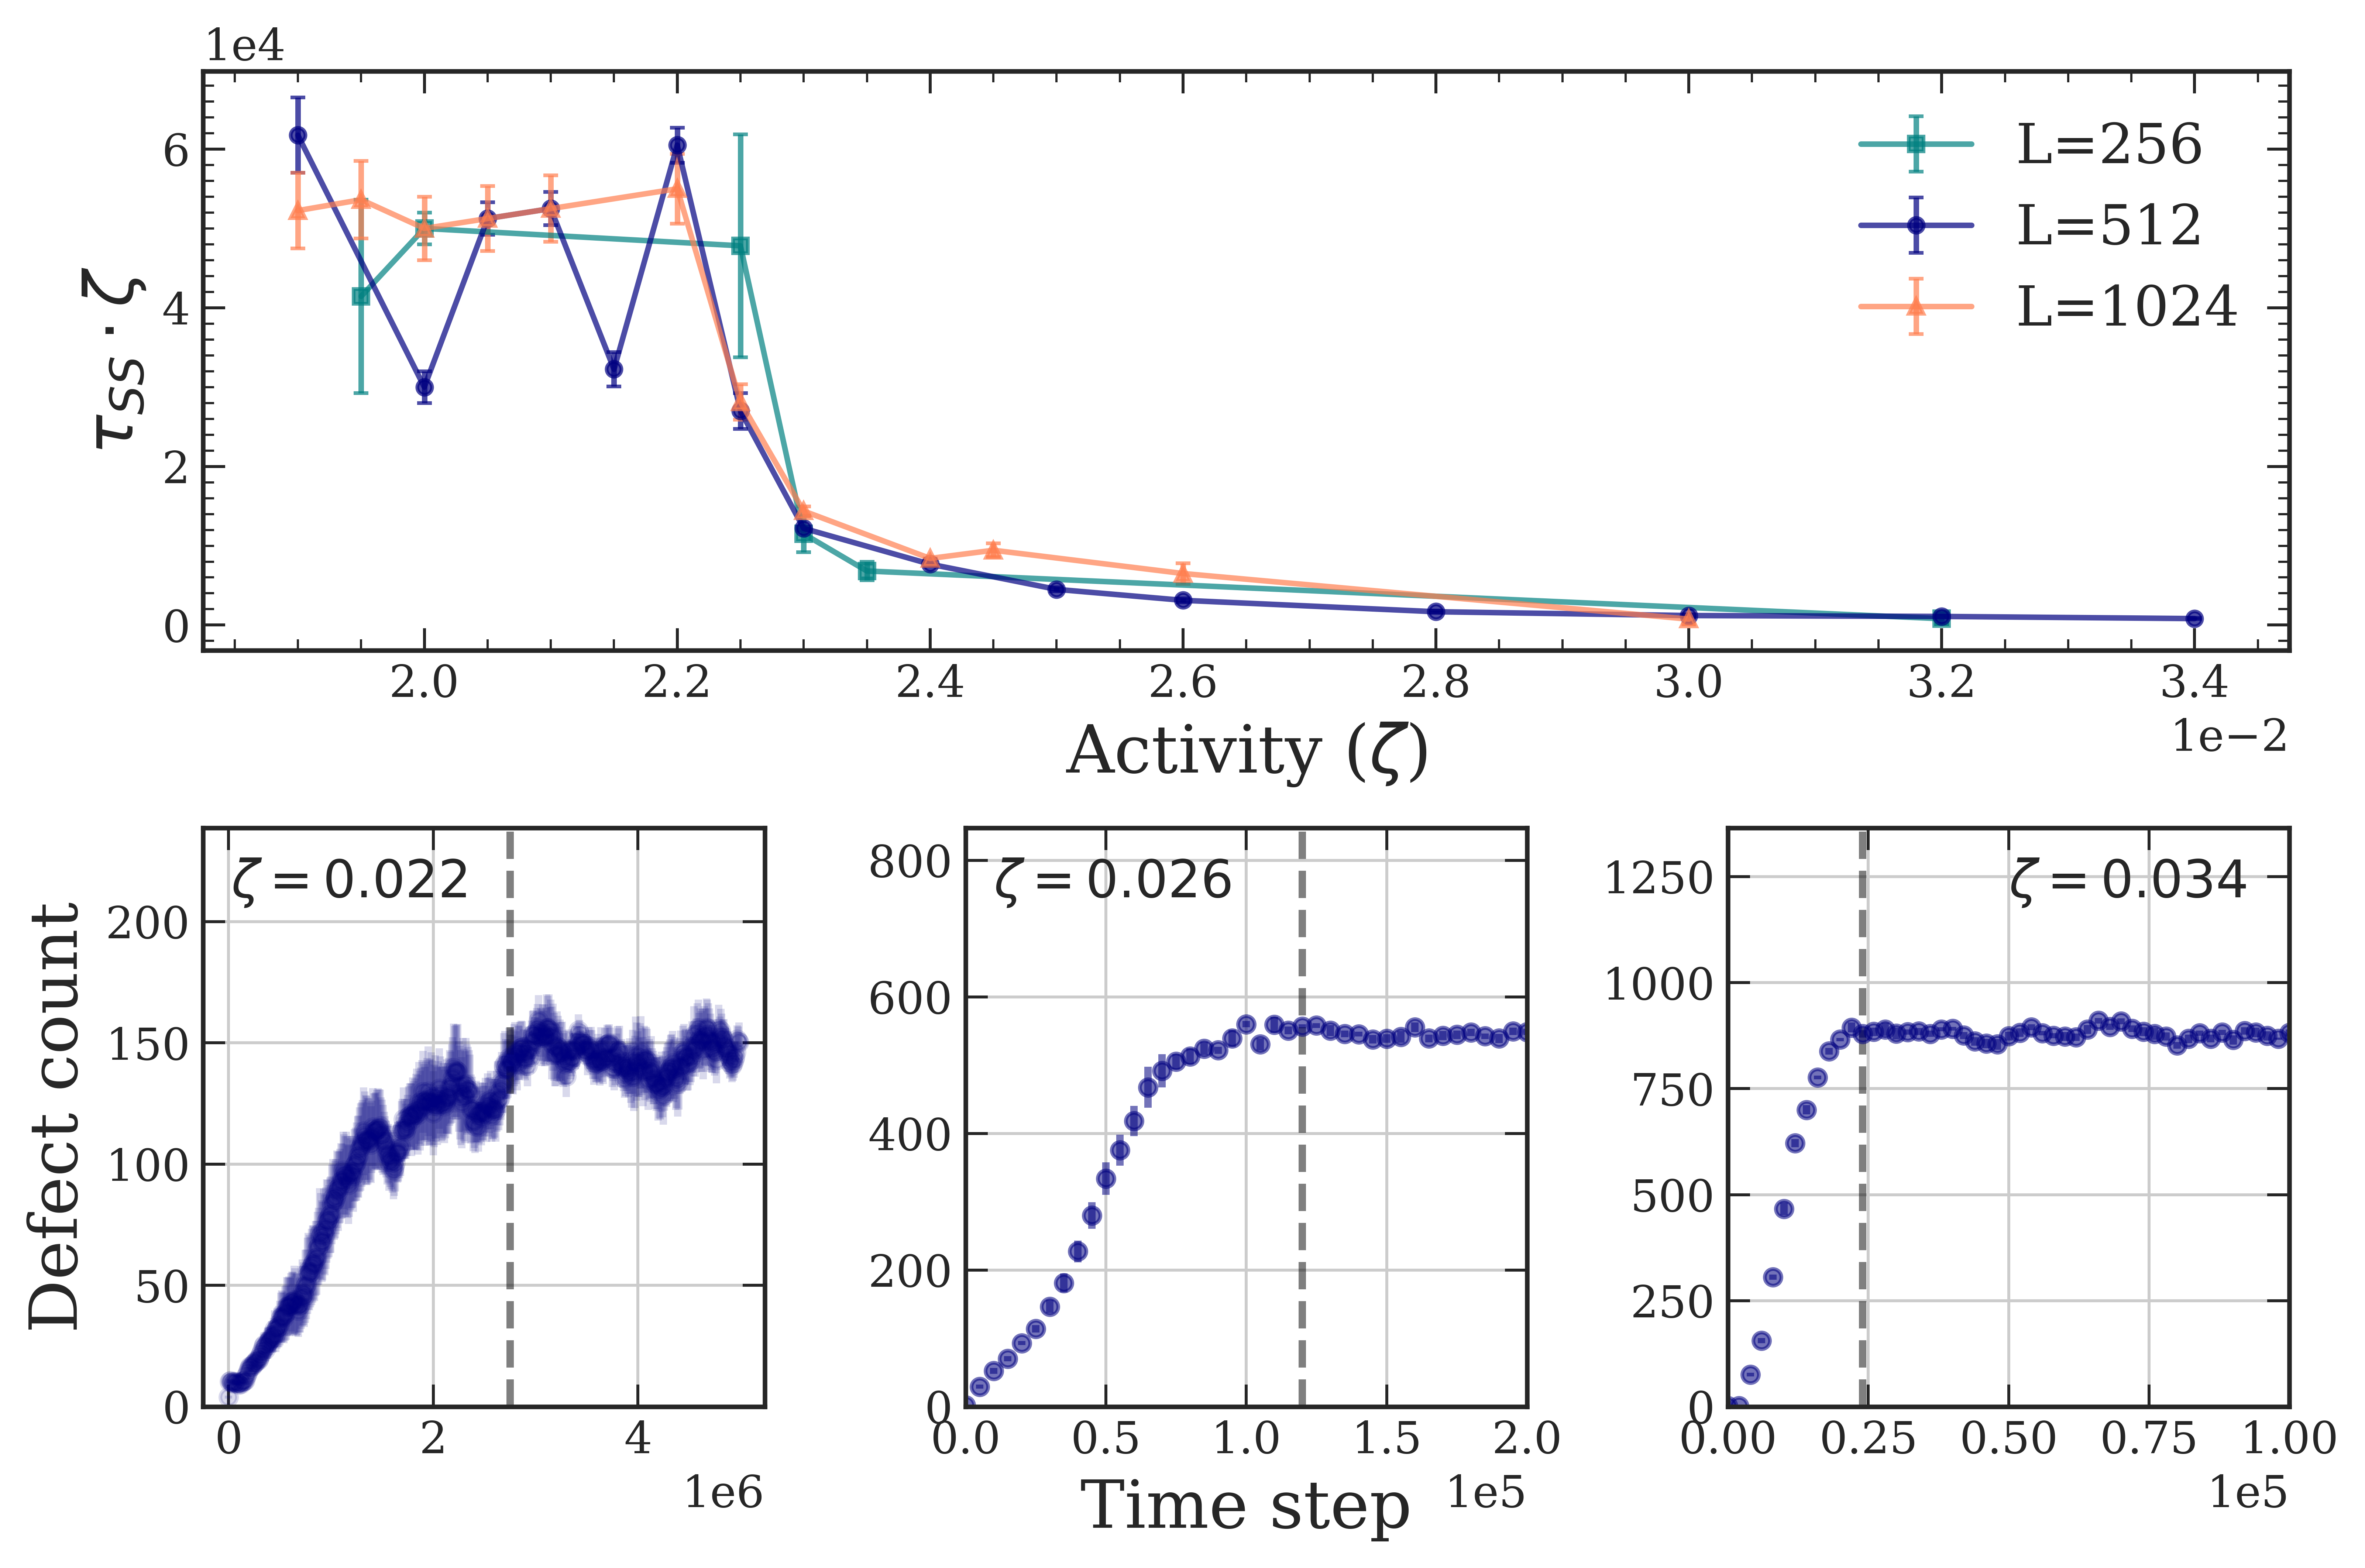

In [83]:

fig, ax = plt.subplot_mosaic("AAA;BCD", figsize=(4,6))
axes = [ax['A'], ax['B'], ax['C'], ax['D']]
scale_with_activity = True
act_idx_cutoff_512 = 1

X_256 = np.array([0.0195, 0.02, 0.0225, 0.023, 0.0235, 0.032])
Y_256 = np.array([(1.5e6 + 2.75e6)/2, 2.5e6, (1.5e6 + 2.75e6) / 2, 5e5, 2.9e5, 2.5e4])
dY_256 = np.array([np.std([1.5e6, 2.75e6]), 1e5, np.std([1.5e6, 2.75e6]), 1e5, 5e4, 2e4])

X_1024 = np.array([0.019, 0.0195, 0.02, 0.0205, 0.021, 0.022, .0225, 0.023, 0.024, 0.0245, 0.026, 0.03])
Y_1024 = np.array([(2.5e6 + 3e6)/2, (2.5e6 + 3e6)/2, 2.5e6, 2.5e6, 2.5e6, 2.5e6, 1.25e6, (6e5+6.5e5)/2, (3e5+4e5)/2, (3.5e5+4.2e5)/2,(2e5+3e5)/2, 2.5e4])
dY_1024 = np.array([np.std([2.5e6, 3e6]), np.std([2.5e6, 3e6]), 2e5, 2e5, 2e5, 2e5, 1e5, np.std([6e5, 6.5e5]), np.std((3e5+4e5)/2), np.std([3.5e5, 4.2e5]), np.std([2e5, 3e5]), 2e4])


act_list_full = []
for act_list in ad.act_list:
    act_list_full.extend(act_list)
act_list_full.sort()

act_list_full = act_list_full[act_idx_cutoff_512:]
conv_list = np.array([*ad.conv_list[2], *ad.conv_list[1], *ad.conv_list[0]])[act_idx_cutoff_512:]
conv_list_err = np.array([*ad.conv_list_err[2], *ad.conv_list_err[1], *ad.conv_list_err[0]]  )[act_idx_cutoff_512:]

act_p = 1
scaling = 1
conv_list_active = scaling * np.array(act_list_full)**act_p * conv_list
conv_list_active_err = np.array(act_list_full)**act_p * conv_list_err

#fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
marker_list = ['s', 'o', '^', 'v']

for marker, LX, X, Y, dY in zip(marker_list, [256, 512, 1024], [X_256, act_list_full, X_1024],\
                                 [Y_256, conv_list, Y_1024], [dY_256, conv_list_err, dY_1024]):
    if scale_with_activity:
        Y = np.array(Y) * np.array(X)**act_p
        dY = np.array(dY) * np.array(X)**act_p
    ax['A'].errorbar(X, Y, yerr=dY, lw=1.5, fmt = f'{marker}-', capsize=2, label=f'L={LX}', markersize=4, alpha=.7)# ecolor='teal', elinewidth=1,\

#ax.errorbar(X_256, Y_256, yerr=dY_256, fmt='.-', label='L=256', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
#ax.errorbar(act_list_full[1:], conv_list[1:], yerr=conv_list_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)
#ax.errorbar(X_1024, Y_1024, yerr=dY_1024, fmt='.-', label='L=1024', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
# ecolor='teal', elinewidth=1,\

#ax.errorbar(act_list_full[1:], conv_list_active[1:], yerr=conv_list_active_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\


act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)

ax['A'].set(xlabel=rf'Activity ($\zeta$)', ylabel=r'$\tau_{SS} \cdot \zeta$',)
ax['A'].legend()
#ax.set_yscale('log')
#ax.grid(True, which = 'both')
ax['A'].xaxis.set_minor_locator(MultipleLocator(5e-4))
ax['A'].yaxis.set_minor_locator(MultipleLocator(2e3))


act_list = [0.022, 0.026, 0.034]
#axes[1].set_xlim(0,3)
axes[2].set(xlim = (0,2e5))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))
axes[3].set(xlim = (0,1e5))#, xticks = np.linspace(0,5e5,5))#, xticklabels = np.linspace(0,5e5,5))
plot_defects_per_activity(ad, activity=act_list[0], ax = ax['B'], Ndataset=2, alpha=.15)
plot_defects_per_activity(ad, activity=act_list[1], ax = ax['C'], Ndataset=1)
plot_defects_per_activity(ad, activity=act_list[2], ax = ax['D'], Ndataset=0)
axes[1].set(ylabel = 'Defect count')
axes[2].set(xlabel = 'Time step')
for i, ax in enumerate(axes[1:]):
   # ax.set(xlabel = 'Time step', ylabel = 'Defect count')
  #  ax.grid()
    xpos = 0.05 if i<2 else 0.5
    ax.text(xpos, 0.95, rf'$\zeta = {act_list[i]}$', transform=ax.transAxes, fontsize=14, verticalalignment='top', fontweight='normal')
  #  ax.text(rf'$\zeta = {act_list[i]}$', x=0.5, y=0.9, transform=ax.transAxes, fontsize=12)    
    #ax.xaxis.set_minor_locator(MultipleLocator(5000))
    #ax.yaxis.set_minor_locator(MultipleLocator(5))
#axB = plot_defects_per_activity(ad, activity=0.022, ax = ax['B'], Ndataset=2)
fig.tight_layout()
fig.dpi = 720

525000
325000
225000
125000


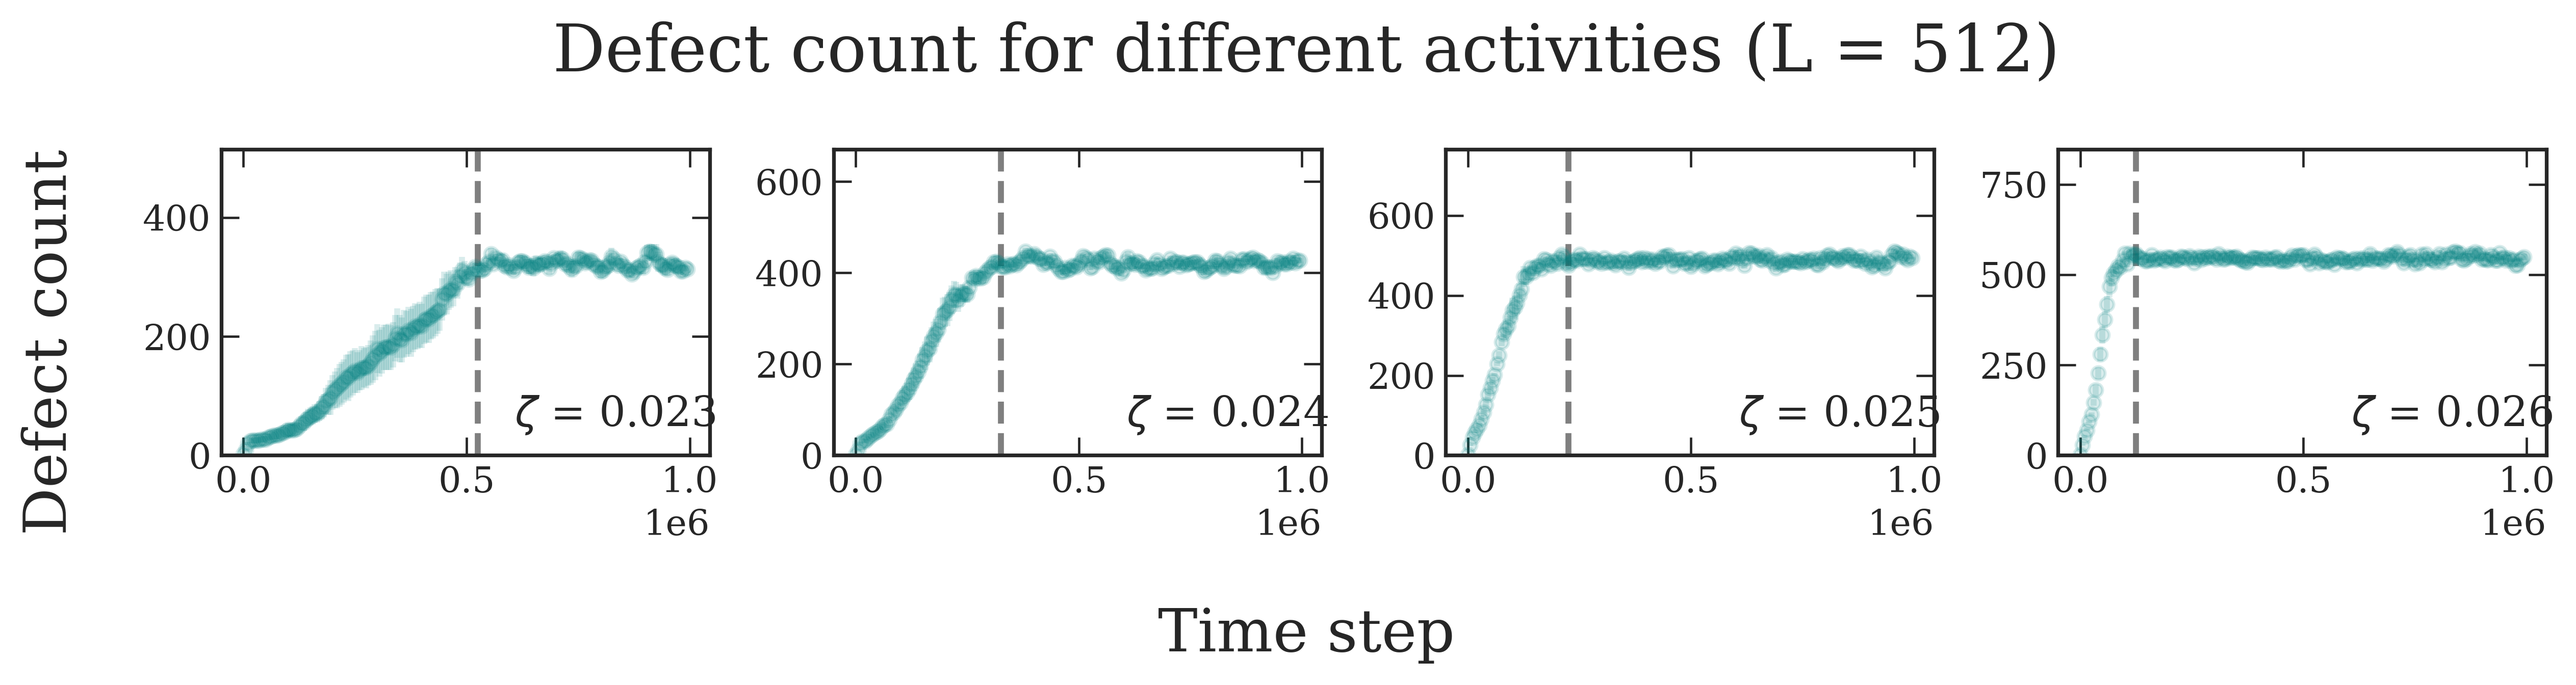

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [14]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 80, max_sigma_dist = .5)
ad.plot_defects_per_activity(Ndataset=1, estimate_stationarity=True, stationarity_dict=stationarity_dict)